In [2]:
import json
import time
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load_test_results(lab_name):
    """Load test results from json file"""
    try:
        with open(f"./scripts/{lab_name}_complete_test_results.json", 'r') as f:
            return json.load(f)
    except FileNotFoundError:
        print(f"Could not find test results for {lab_name}")
        return None

In [4]:
better_hierarchy_results = load_test_results("better-hierarchy")
full_mesh_results = load_test_results("full-mesh")

if not better_hierarchy_results or not full_mesh_results:
    exit(1)

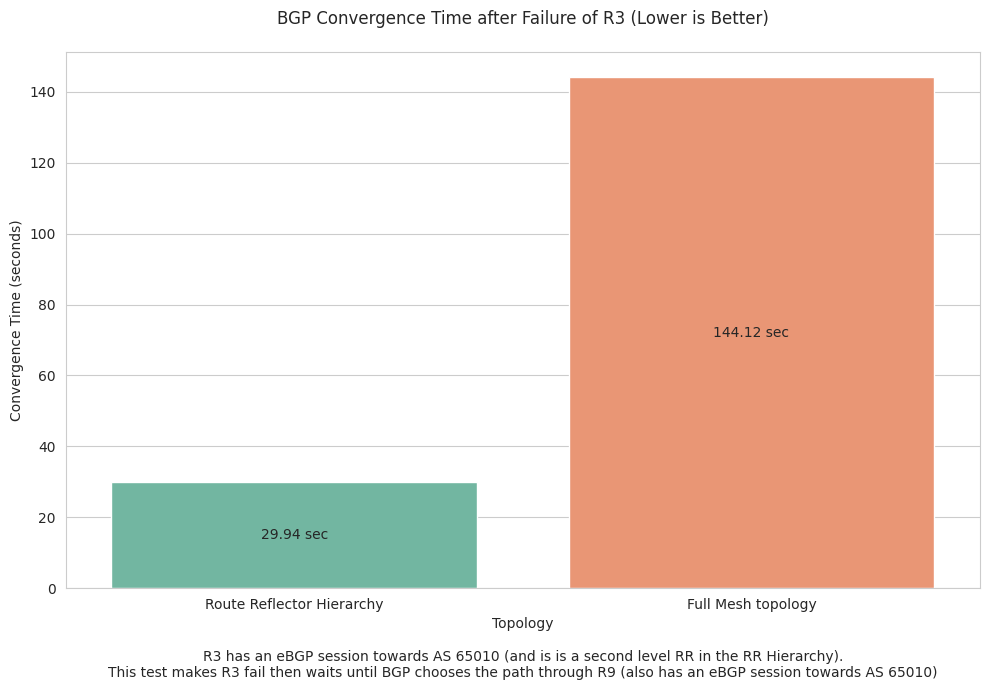

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))

data = pd.DataFrame([
    {"Topology": "Route Reflector Hierarchy", "Convergence Time (s)": better_hierarchy_results["convergence_time"]},
    {"Topology": "Full Mesh topology", "Convergence Time (s)": full_mesh_results["convergence_time"]}
])

ax = sns.barplot(x="Topology", y="Convergence Time (s)", data=data, palette='Set2', hue="Topology")

plt.title("BGP Convergence Time after Failure of R3 (Lower is Better)", pad=20)
plt.ylabel("Convergence Time (seconds)")
plt.xlabel('''Topology
           
R3 has an eBGP session towards AS 65010 (and is is a second level RR in the RR Hierarchy).
This test makes R3 fail then waits until BGP chooses the path through R9 (also has an eBGP session towards AS 65010)''')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f sec', label_type='center')

plt.tight_layout()

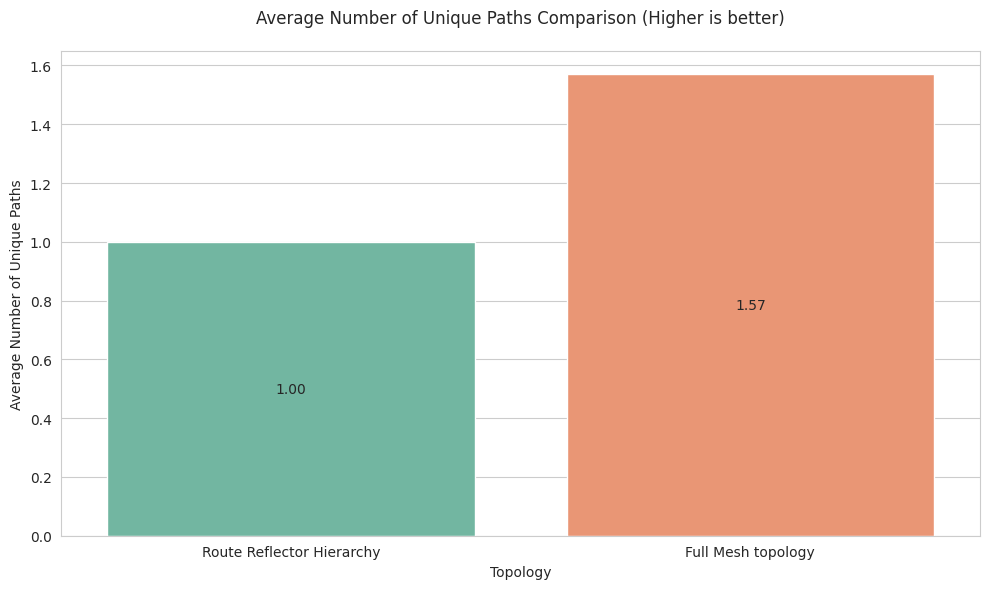

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

data = pd.DataFrame([
    {"Topology": "Route Reflector Hierarchy", "Average Number of Unique Paths": better_hierarchy_results["average_paths"]},
    {"Topology": "Full Mesh topology", "Average Number of Unique Paths": full_mesh_results["average_paths"]}
])

ax = sns.barplot(x="Topology", y="Average Number of Unique Paths", data=data, palette='Set2', hue="Topology")

plt.title("Average Number of Unique Paths Comparison (Higher is better)", pad=20)
plt.ylabel("Average Number of Unique Paths")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')

plt.tight_layout()